# Data Analysis

In [ ]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../src")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from cache import CACHE
from utils import load_data, setup_logging

setup_logging()

plt.rcParams["figure.figsize"] = (4, 3)

PATH_DATA = Path("../data")
PATH_OUTPUT = Path("../output")

CACHE.init(cache_dir=PATH_OUTPUT / "cache")

[2025-05-15 18:56:38] INFO     cache:21    Cache directory: ../output/cache


## Load data

In [ ]:
train_dataset = load_data(PATH_DATA / "training.csv")
test_dataset = load_data(PATH_DATA / "test.csv")

## Basic analysis

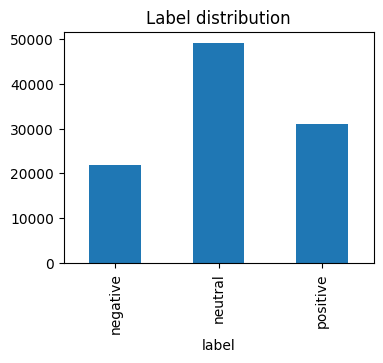

In [ ]:
train_dataset["label"].value_counts(sort=False).plot.bar()
plt.title("Label distribution")
plt.show()

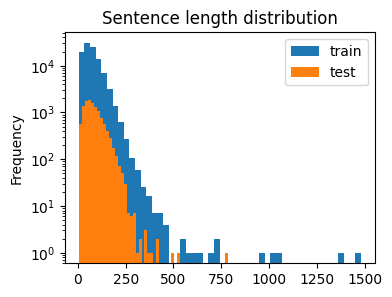

In [ ]:
train_dataset["sentence"].str.len().plot.hist(bins=50, log=True, label="train")
test_dataset["sentence"].str.len().plot.hist(bins=50, log=True, label="test")
plt.title("Sentence length distribution")
plt.legend()
plt.show()

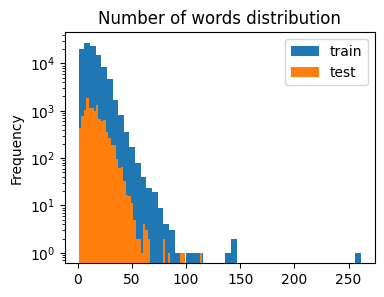

In [ ]:
train_dataset["sentence"].str.split(" ").map(len).plot.hist(bins=50, log=True, label="train")
test_dataset["sentence"].str.split(" ").map(len).plot.hist(bins=50, log=True, label="test")
plt.title("Number of words distribution")
plt.legend()
plt.show()

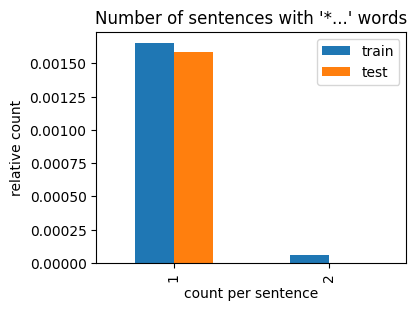

,sentence,label
id,,
82929,*** CONS ***\n* None.,positive
20517,"It had *some* awesome shops and *some* great dining selections, but that has completely changed.",negative
95871,Be sure to **make a reservation** if you're going with other people and **purchase the Yelp deal** to save some monies!,neutral


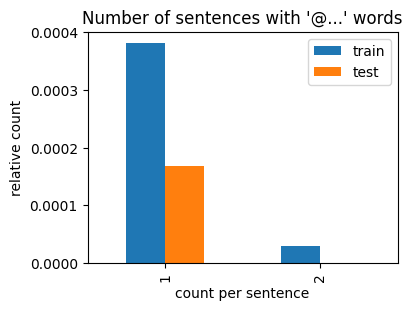

,sentence,label
id,,
13844,"I am very happy to report that my vehiclewas totally fixed by Nick @ ""The Original Dick's Speed-O-Tach"" in Phoenix @ a fraction of the price.",positive
6619,"Went in last week to look @ Certified pre-owned, Genesis, didn't get my car parked, and here comes Eddie, told him what car I wanted to see, and we just wanted to look @ it.",neutral
65577,Dropped my boys off @ 8am & got a call @ 12 noon informing me that they were finished!,neutral


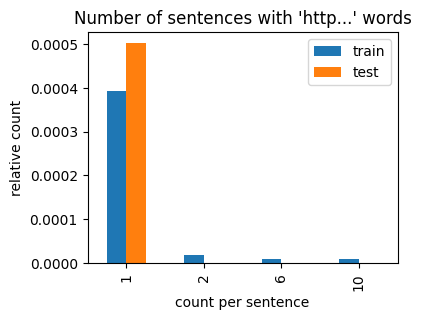

,sentence,label
id,,
73049,Amma's Homemade Tomato Soup: http://www.yelp.com/biz_photos/poppy-den-by-angelo-sosa-las-vegas?select=PkZ0qiTnB9QGDS6w0B199g#PkZ0qiTnB9QGDS6w0B199g\n\nRoasted Duck Breast with Poppy Honey: http://www.yelp.com/biz_photos/poppy-den-by-angelo-sosa-las-vegas?select=zqpmi5UjdVTDWwjV6ejO4Q#zqpmi5UjdVTDWwjV6ejO4Q\n\nPoppy Fries with Kim Cheese Sauce: http://www.yelp.com/biz_photos/poppy-den-by-angelo...,neutral
37495,"$35), http://www.yelp.com/biz_photos/joel-robuchon-las-vegas-6?select=JD9j9dYn8e7PUXXLWucl7A#ZEUpkrMTmO2BU2UKkNYxJQ\nLe Bar, http://www.yelp.com/biz_photos/joel-robuchon-las-vegas-6?select=JD9j9dYn8e7PUXXLWucl7A#O3RixLub7PnheTlMKKWNAg\nLa Langouste, http://www.yelp.com/biz_photos/joel-robuchon-las-vegas-6?select=JD9j9dYn8e7PUXXLWucl7A#T8m9o_Ti8yuRziwn9WwY7A\nLe Bœuf, http://www.yelp.com/biz_ph...",neutral
34147,Didn't see their website on here so here it is: http://www.wildwestpawn.com/\nor if you want to bid on their online items you can go here: http://www.auctionnation.net/auctions/cave-creek-onsite-wild-west-pawn-shop-online-auction/,neutral


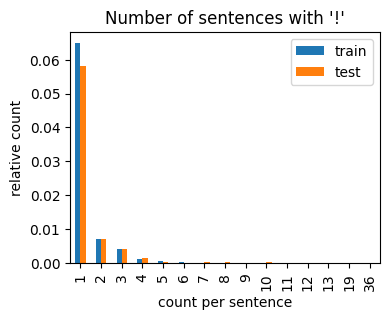

,sentence,label
id,,
44176,Please don't feed the Yelp trolls!!!!!!!!!!!!!!!!!!!,negative
69358,HOOORRRIIBBBLLLEEE!!!!!!!!!!!!!,negative
76868,!!!!!!!!!!!!,neutral


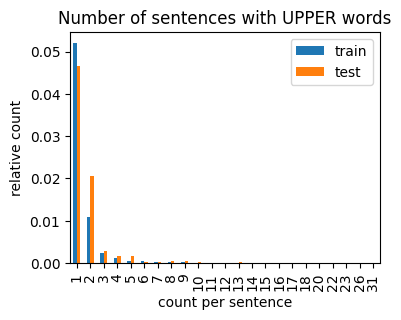

,sentence,label
id,,
63266,"GO JUMP IN A SEWER FULL OF PISS AND POOP AND SWIM WITH YOUR MOUTH OPEN, IT WILL LEAVE YOU MORE HAPPY AND SATISFIED THAN SITTING THROUGH THIS DISASTER OF A SHOW WILL!",negative
24862,PLEASE LET ME STRESS THAT THIS PARAGRAPH IS ONLY TO SHOW THE FRUSTRATION WE WERE HAVING WITH ANOTHER COMPANY WHO CREATED OUR ROCK SLIDE AND WATERFALL.,negative
37267,"FOR ADDITIONAL REVIEWS OR INFORMATION, JUST TYPE IN MCKENNA PROPERTY MANAGEMENT INTO ANY SEARCH ENGINE AND YOU CAN READ REVIEWS FROM OUTSIDE SOURCES.",neutral


In [ ]:
def analyze_syntax(f, desc):
    train_counts = f(train_dataset["sentence"])
    test_counts = f(test_dataset["sentence"])

    pd.DataFrame({
        "train": train_counts.value_counts(normalize=True).drop(index=0),
        "test": test_counts.value_counts(normalize=True).drop(index=0),
    }).plot.bar()
    plt.title(f"Number of sentences with {desc}")
    plt.xlabel("count per sentence")
    plt.ylabel("relative count")
    plt.show()

    with pd.option_context("display.max_colwidth", 400):
        display(train_dataset.loc[train_counts.sort_values(ascending=False).head(3).index])

analyze_syntax(
    lambda df: df.str.split(" ").map(lambda words: sum(1 for w in words if w.startswith("*"))),
    "'*...' words",
)
analyze_syntax(
    lambda df: df.str.split(" ").map(lambda words: sum(1 for w in words if w.startswith("@"))),
    "'@...' words",
)
analyze_syntax(
    lambda df: df.str.split(" ").map(lambda words: sum(1 for w in words if w.startswith("http"))),
    "'http...' words",
)
analyze_syntax(
    lambda df: df.str.count("\\!"),
    "'!'",
)
analyze_syntax(
    lambda df: df.str.split(" ").map(lambda words: sum(1 for w in words if len(w) > 1 and w.isupper())),
    "UPPER words",
)

## Pre-trained models analysis

In [ ]:
from pipelines.pretrained_classifier import map_to_labels
from cache import load_embeddings
from utils import evaluate_score
from sklearn.metrics import cohen_kappa_score

SENTIMENT_MODEL_NAMES = [
    "cardiffnlp/twitter-roberta-base-sentiment-latest",
    "cardiffnlp/twitter-xlm-roberta-base-sentiment",
    "nlptown/bert-base-multilingual-uncased-sentiment",
    "siebert/sentiment-roberta-large-english",
    "tabularisai/multilingual-sentiment-analysis",
]
SARCASM_MODEL_NAMES = [
    "helinivan/multilingual-sarcasm-detector",
    "helinivan/english-sarcasm-detector",
]

def load_predictions(model_name):
    return load_embeddings("huggingface", model_name, "predictions_train.csv", load_kwargs={"index_col": 0}, verbose=False)

def load_labels(model_name, label_mapping=None):
    predictions = load_predictions(model_name)
    labels = map_to_labels(predictions, model_name)
    if label_mapping is not None:
        labels = labels.map(label_mapping)
    return labels

def load_labels_all(model_names, label_mapping=None):
    label_pred = {}
    for model_name in model_names:
        label_pred[model_name] = load_labels(model_name, label_mapping)
    return pd.DataFrame(label_pred)

### Sentiment models

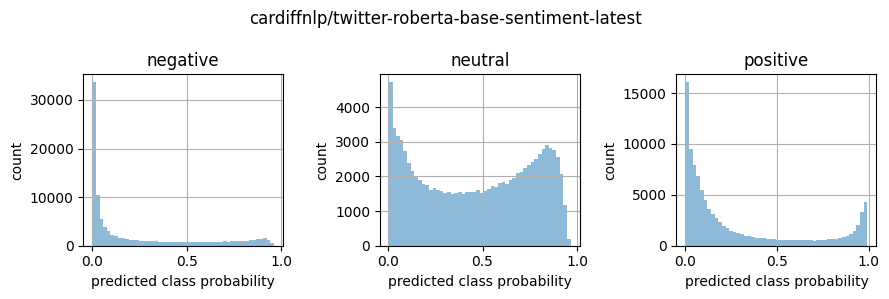

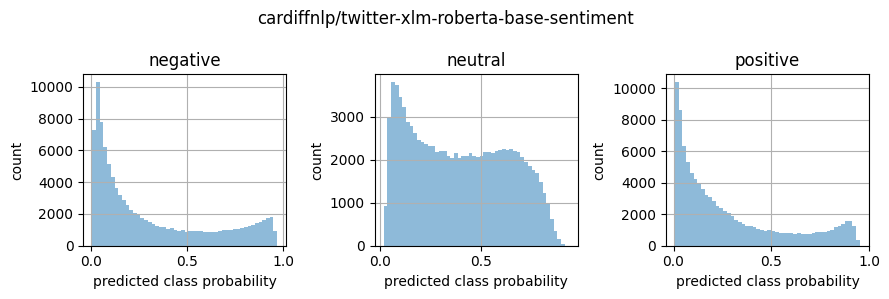

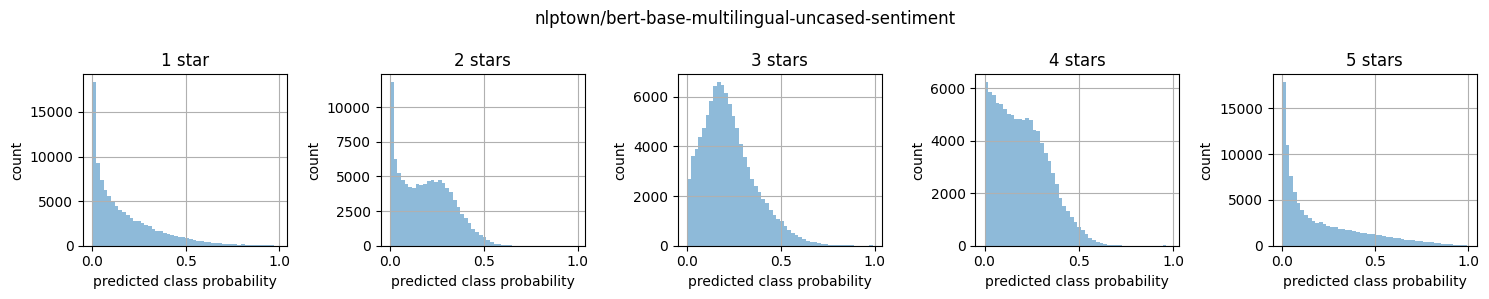

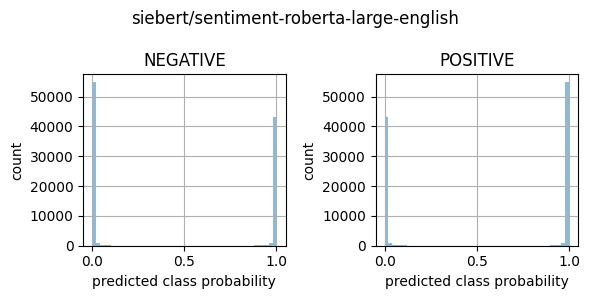

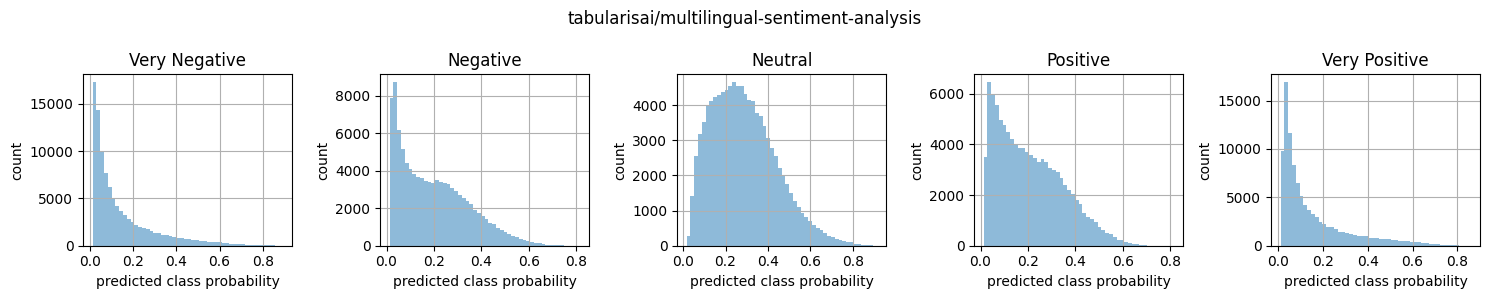

In [ ]:
def analyze_prediction_distribution(model_name):
    predictions = load_predictions(model_name)

    # plot distribution of predictions
    predictions.hist(bins=50, alpha=0.5, layout=(1, predictions.shape[1]), figsize=(3 * predictions.shape[1], 3))
    plt.suptitle(model_name)
    for ax in plt.gcf().axes:
        ax.set_xlabel("predicted class probability")
        ax.set_ylabel("count")
    plt.tight_layout()
    plt.show()

for model_name in SENTIMENT_MODEL_NAMES:
    analyze_prediction_distribution(model_name)

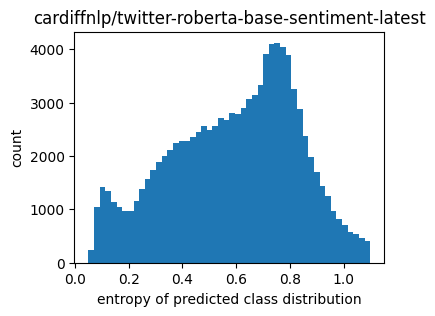

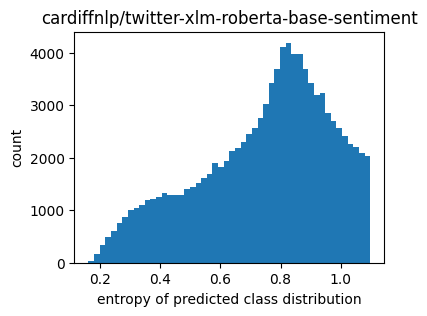

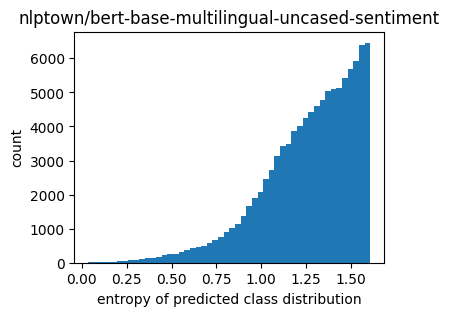

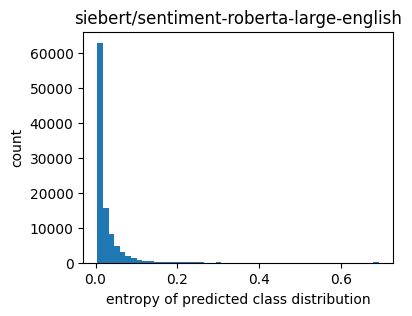

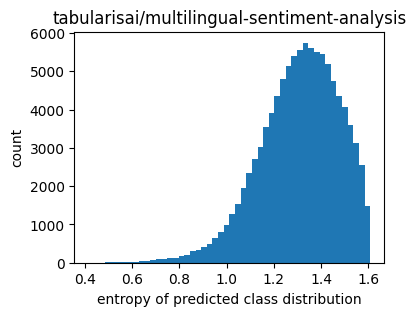

In [ ]:
def analyze_prediction_entropy(model_name):
    predictions = load_predictions(model_name)

    # plot distribution of predicted class distribution entropy
    entropy = np.sum(predictions * -np.log(predictions), axis=1)
    pd.Series(entropy).plot.hist(bins=50)
    plt.title(model_name)
    plt.xlabel("entropy of predicted class distribution")
    plt.ylabel("count")
    plt.show()

for model_name in SENTIMENT_MODEL_NAMES:
    analyze_prediction_entropy(model_name)

In [ ]:
def analyze_sentiment_score(model_names):
    # load predictions
    label_true = train_dataset["label"]
    label_pred = load_labels_all(model_names)

    # compute scores
    scores = [evaluate_score(label_true, label_pred[model_name]) for model_name in model_names]

    # display scores
    scores = pd.DataFrame({"score": scores}, index=model_names)
    display(scores)

analyze_sentiment_score(SENTIMENT_MODEL_NAMES)

,score
cardiffnlp/twitter-roberta-base-sentiment-latest,0.829226
cardiffnlp/twitter-xlm-roberta-base-sentiment,0.801282
nlptown/bert-base-multilingual-uncased-sentiment,0.706882
siebert/sentiment-roberta-large-english,0.676876
tabularisai/multilingual-sentiment-analysis,0.737220


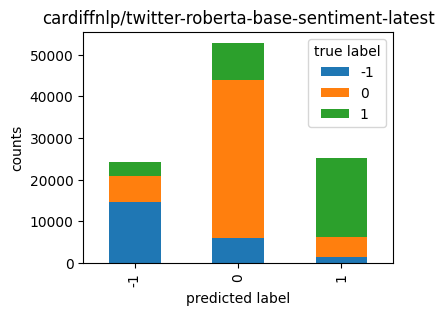

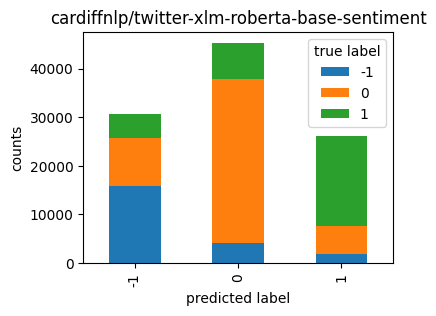

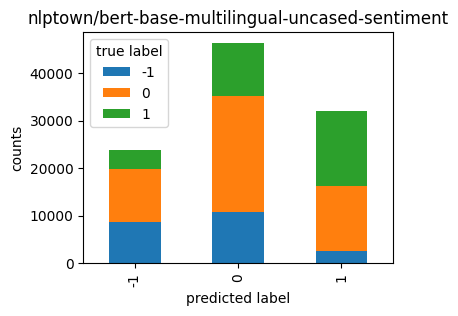

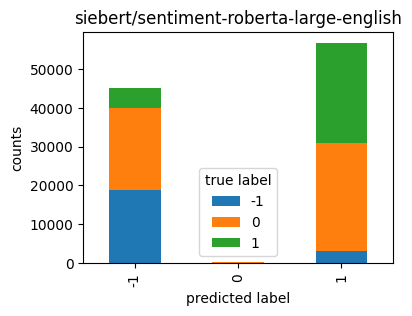

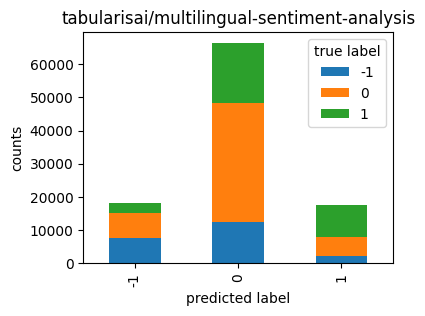

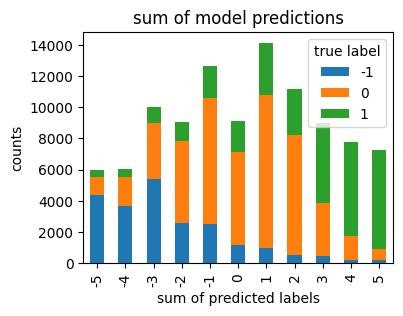

In [ ]:
def analyze_sentiment_predictions(model_names):
    label_mapping = {
        "negative": -1,
        "neutral": 0,
        "positive": 1,
    }

    # load predictions
    label_true = train_dataset["label"].map(label_mapping)
    label_pred = load_labels_all(model_names, label_mapping)

    # plot predicted labels
    for model_name in model_names:
        pd.DataFrame({"true label": label_true, "predicted label": label_pred[model_name]}).groupby("true label")["predicted label"].value_counts().unstack("true label").plot.bar(stacked=True)
        plt.title(model_name)
        plt.ylabel("counts")
        plt.show()

    # plot sum of predicted labels
    pd.DataFrame({"true label": label_true, "sum of predicted labels": label_pred.sum(axis=1)}).groupby("true label")["sum of predicted labels"].value_counts().unstack("true label").plot.bar(stacked=True)
    plt.title("sum of model predictions")
    plt.ylabel("counts")
    plt.show()

analyze_sentiment_predictions(SENTIMENT_MODEL_NAMES)

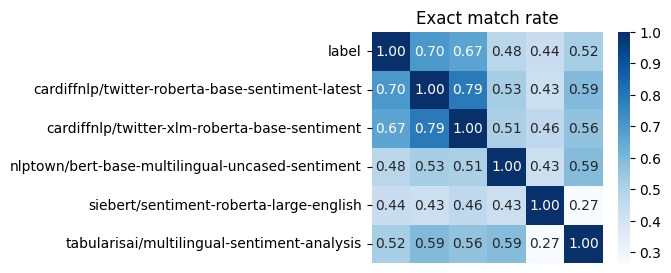

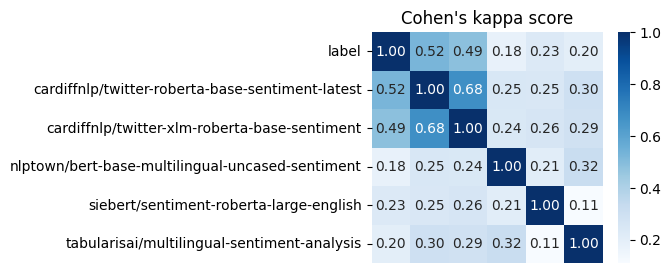

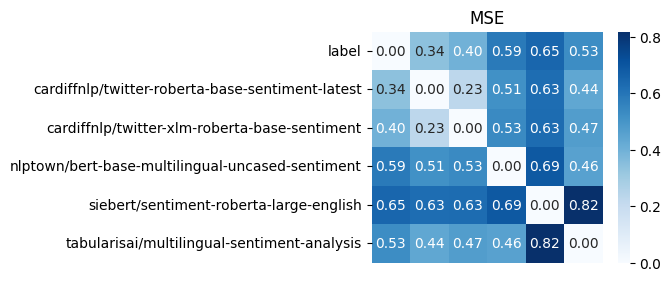

In [ ]:
def analyze_sentiment_model_agreement(model_names):
    label_mapping = {
        "negative": -1,
        "neutral": 0,
        "positive": 1,
    }

    # load predictions
    label_true = train_dataset["label"].map(label_mapping)
    label_pred = load_labels_all(model_names, label_mapping)
    labels_all = pd.concat([label_true, label_pred], axis=1)

    # plot pairwise scores between models
    def map_pairwise_columns(df, f):
        corr = pd.DataFrame(index=df.columns, columns=df.columns, dtype=float)
        for i in df.columns:
            for j in df.columns:
                corr.loc[i, j] = f(df[i].to_numpy(), df[j].to_numpy())
        return corr

    score_matrix = map_pairwise_columns(labels_all, lambda x, y: np.mean(x == y))
    sns.heatmap(score_matrix, cmap="Blues", annot=True, fmt=".2f", xticklabels=False, square=True)
    plt.title("Exact match rate")
    plt.show()

    score_matrix = map_pairwise_columns(labels_all, cohen_kappa_score)
    sns.heatmap(score_matrix, cmap="Blues", annot=True, fmt=".2f", xticklabels=False, square=True)
    plt.title("Cohen's kappa score")
    plt.show()

    score_matrix = map_pairwise_columns(labels_all, lambda x, y: np.mean(np.abs(x - y)))
    sns.heatmap(score_matrix, cmap="Blues", annot=True, fmt=".2f", xticklabels=False, square=True)
    plt.title("MSE")
    plt.show()

    # TODO
    # display(labels_all.value_counts().reset_index(name="count"))

analyze_sentiment_model_agreement(SENTIMENT_MODEL_NAMES)

,negative,neutral,positive,label,score,sentence
id,,,,,,
0,5,0,0,negative,1.0,Those 2 drinks are part of the HK culture and ...
1,5,0,0,negative,1.0,I was told by the repair company that was doin...
2,0,1,4,neutral,0.6,It is there to give them a good time .
3,2,2,1,negative,0.6,Like leafing through an album of photos accomp...
4,0,1,4,positive,0.9,Johnny was a talker and liked to have fun.
...,...,...,...,...,...,...
102092,3,2,0,negative,0.8,I thought this place was supposed to be good.
102093,3,2,0,negative,0.8,They claim it's because people didn't like it ...
102094,1,3,1,neutral,0.8,There is also another marbled-out full bathroo...


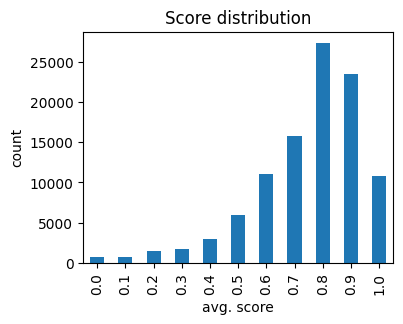

In [ ]:
def analyze_sentiment_model_voting(model_names):
    label_mapping = {
        "negative": -1,
        "neutral": 0,
        "positive": 1,
    }
    label_mapping_inverted = {v: k for k, v in label_mapping.items()}

    # load predictions
    sentences = train_dataset["sentence"]
    label_true = train_dataset["label"].map(label_mapping)
    label_pred = load_labels_all(model_names, label_mapping)

    # count number of votes for each sample
    label_pred_count = label_pred.apply(pd.Series.value_counts, axis=1).fillna(0).astype(int)

    # compute score weighted by votes for each sample
    scores_individual = 0.5 * (2 - np.abs(label_pred_count.columns.values - label_true.values[:, None]))
    scores = (label_pred_count * scores_individual).sum(axis=1) / label_pred_count.sum(axis=1)

    # finalize dataframe
    label_pred_count.rename(columns=label_mapping_inverted, inplace=True)
    label_pred_count["label"] = label_true.map(label_mapping_inverted)
    label_pred_count["score"] = scores
    label_pred_count["sentence"] = sentences
    display(label_pred_count)

    # plot distribution of weighted scores
    label_pred_count["score"].value_counts().sort_index().plot.bar()
    plt.title("Score distribution")
    plt.xlabel("avg. score")
    plt.ylabel("count")
    plt.show()

    return label_pred_count

label_pred_count = analyze_sentiment_model_voting(SENTIMENT_MODEL_NAMES)

In [ ]:
with pd.option_context("display.max_colwidth", 400, "display.max_rows", 100):
    display(label_pred_count.sort_values("score", ascending=False).tail(20))
    display(label_pred_count[label_pred_count["score"] == 0.1].tail(20))

,negative,neutral,positive,label,score,sentence
id,,,,,,
21850,0,0,5,negative,0.0,"Everyone loves this song, everyone except for me."
21814,5,0,0,positive,0.0,I failed the NCLEX three times before coming across Rachell Allen.
21816,5,0,0,positive,0.0,The end of hallway suite spoiled me terribly.
57043,5,0,0,positive,0.0,"The reviews said the food was disgusting and overcooked, they all lied!"
92379,5,0,0,positive,0.0,"I dined here opening week, and again three days ago as a second chance in hopes the kinks would be worked out. They all disappeared."
14831,0,0,5,negative,0.0,Gee I always love the great heartburn after their meal deal.
2447,0,0,5,negative,0.0,I highly recommend this airport shuttle if you love missing your flights.
32559,5,0,0,positive,0.0,"Many kabobs in this city are incredibly bland and under seasoned, definitely not the case here."
2394,0,0,5,negative,0.0,"The new Mesa location is fantastic, especially if you like to aimlessly wander into bustling traffic!"


,negative,neutral,positive,label,score,sentence
id,,,,,,
99584,4,1,0,positive,0.1,There was even a decent amount of meat on the bone that stewed so long that it practically fell off with a slight tap and landed in our mouths.
99699,0,1,4,negative,0.1,The number 1 thing for me is for us to have a great time but certainly make my wife's time off work memorable....not for the shortcomings of a bad hotel stay.
99861,0,1,4,negative,0.1,Lets just say I retained a lawyer for the first time in my life.
99979,4,1,0,positive,0.1,The actual bar in this place is very long and there's never too much of a wait to order a drink.
100030,4,1,0,positive,0.1,They advertise as feeding four people but 7 of us could barely finish it!!
100057,4,1,0,positive,0.1,"People say the wait is too long, they are wrong."
100216,0,1,4,negative,0.1,Every employee seems to be able to do whatever they want to do.
100693,4,1,0,positive,0.1,I was given a whole bowl when I asked for another lime wedge because mine was dried out.
100872,4,1,0,positive,0.1,Someone else would have told me too bad... NOT HIM .


### Sarcasm models

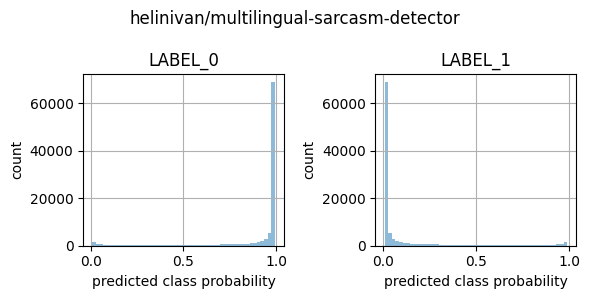

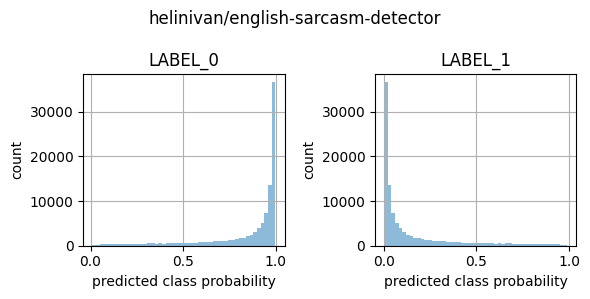

In [ ]:
def analyze_prediction_distribution(model_name):
    predictions = load_predictions(model_name)

    # plot distribution of predictions
    predictions.hist(bins=50, alpha=0.5, layout=(1, predictions.shape[1]), figsize=(3 * predictions.shape[1], 3))
    plt.suptitle(model_name)
    for ax in plt.gcf().axes:
        ax.set_xlabel("predicted class probability")
        ax.set_ylabel("count")
    plt.tight_layout()
    plt.show()

for model_name in SARCASM_MODEL_NAMES:
    analyze_prediction_distribution(model_name)

In [ ]:
def analyze_sarcasm_predictions(model_name):
    predictions = load_predictions(model_name)
    predictions = train_dataset.assign(sarcasm=predictions["LABEL_1"])

    print(model_name)
    with pd.option_context("display.max_colwidth", 400):
        display(predictions.sort_values("sarcasm", ascending=False).head(10))

for model_name in SARCASM_MODEL_NAMES:
    analyze_sarcasm_predictions(model_name)

helinivan/multilingual-sarcasm-detector


,sentence,label,sarcasm
id,,,
19348,"Corrected At Time Of Inspection\n47 Non-food contact surfaces clean 4-601.11, C: Equipment, Food-Contact Surfaces, Nonfood-Contact Surfaces, and Utensils --- Observed two large bins with heavy food debris inside near dishwashing area that were being used for storage of containers, lids, and various kitchen utensils.",negative,0.990829
89356,Next time I'd recommend getting just soft serve with mochi--no cake. very impressive,positive,0.990676
9412,Tasted very homemade with what appeared to be coarsely chopped tender home pickled cucumber slices vs the usual chunks of tough-skinned canned pickles.,positive,0.990656
84311,"Mirrored Walls, Dim-Lighting, Suede Baguettes Provide for a Very Sexy Atmosphere\nService: Attractive, Friendly, Professional\nImbibe: Cocktails As Well as MockTails\nDevour: Avocado Toast, Lobster Rolls, Tomato Soup + Cheese Dumplings, Scallop + Elote, Chicken MeatBalls, Empanadas, Short-Rib Mac n' Cheese, Donut Holes w/ Trio of Dipping Sauces\nMediocre: French Onion Dumplings & Pasta\nT...",positive,0.990603
54962,"I've heard of other places in town that play blues-based Rock, but have been to only Knuckledown for Blues.",neutral,0.990595
65774,"Sunk by way too much indulgence of scene-chewing , teeth-gnashing actorliness .",negative,0.990581
6229,I've been patiently waiting to visit Cantina 1511 as it prepared to move to Park Road Shopping Center.,neutral,0.990520
78576,"Has none of the crackle of `` Fatal Attraction '' , `` 9 1\/2 Weeks '' , or even `` Indecent Proposal '' , and feels more like Lyne 's stolid remake of `` Lolita '' .",negative,0.990473
79897,"Schnieder bounces around with limp wrists , wearing tight tummy tops and hip huggers , twirling his hair on his finger and assuming that 's enough to sustain laughs ...",negative,0.990376


helinivan/english-sarcasm-detector


,sentence,label,sarcasm
id,,,
36807,"Man, who reading this used to have a milkbox?",neutral,0.990268
51526,"Very small area to Segway in, not worth the almost 400$ we spent for 5 people. poor place to be",negative,0.990249
30745,Manager knowing all kitchen designs chosen around refrigerator product. quite impressed,positive,0.990126
19830,"first time in dining area, seated in bar area last year - sat down with daughter to eat while in Hudson-went with intentions of spending money!",neutral,0.990090
6384,Nothing more than four or five mild chuckles surrounded by 86 minutes of overly-familiar and poorly-constructed comedy .,negative,0.987948
34923,"Standard free breakfast included, but small casual restaurant attached to exterior of building if you want something else.",positive,0.987770
82440,Small place maybe 8 booths.,neutral,0.987747
37663,"We'd had some bad experiences over the years there (being ignored by waiters, getting seated slowly, stuff like that).",negative,0.987659
35841,"Ecclectic, apparently family owned place that had been highly recommended by a few people that I know.",positive,0.987556
